# Placebo analysis

### Import Libralies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import Dataset

In [109]:
df = pd.read_csv('fake_placebo_no_treatment_blood_pressure_data.csv')
print(df.head())

   ID         Group  Blood_Pressure_Before  Blood_Pressure_After
0   1       Placebo                    106                 103.0
1   2  No Treatment                    107                 108.0
2   3  No Treatment                    116                 114.0
3   4  No Treatment                    125                 128.0
4   5       Placebo                    133                 135.0


### Calculate Group Means

In [111]:
placebo_group = df[df['Group'] == 'Placebo']
no_treatment_group = df[df['Group'] == 'No Treatment']

In [113]:
mean_bp_before_placebo = placebo_group['Blood_Pressure_Before'].mean()
mean_bp_after_placebo = placebo_group['Blood_Pressure_After'].mean()
mean_bp_before_no_treatment = no_treatment_group['Blood_Pressure_Before'].mean()
mean_bp_after_no_treatment = no_treatment_group['Blood_Pressure_After'].mean()

In [123]:
print(f"Placebo Group - Mean Blood Pressure Before Treatment: {mean_bp_before_placebo}")
print(f"Placebo Group - Mean Blood Pressure After Treatment: {mean_bp_after_placebo}")
print(f"No Treatment Group - Mean Blood Pressure Before Treatment: {mean_bp_before_no_treatment}")
print(f"No Treatment Group - Mean Blood Pressure After Treatment: {mean_bp_after_no_treatment}")

Placebo Group - Mean Blood Pressure Before Treatment: 119.419452887538
Placebo Group - Mean Blood Pressure After Treatment: 114.69300911854103
No Treatment Group - Mean Blood Pressure Before Treatment: 119.80947680157946
No Treatment Group - Mean Blood Pressure After Treatment: 119.78874629812438


### Statistical Test

In [71]:
descriptive_stats = df.groupby('Group').agg({
    'Blood_Pressure_Before': ['mean', 'std'],
    'Blood_Pressure_After': ['mean', 'std']
}).reset_index()

In [125]:
descriptive_stats.head()

Group Blood_Pressure_Before            Blood_Pressure_After  \
                                 mean        std                 mean   
0  No Treatment            119.809477  14.622463           119.788746   
1       Placebo            119.419453  15.422197           114.693009   

              
         std  
0  14.708861  
1  15.652086

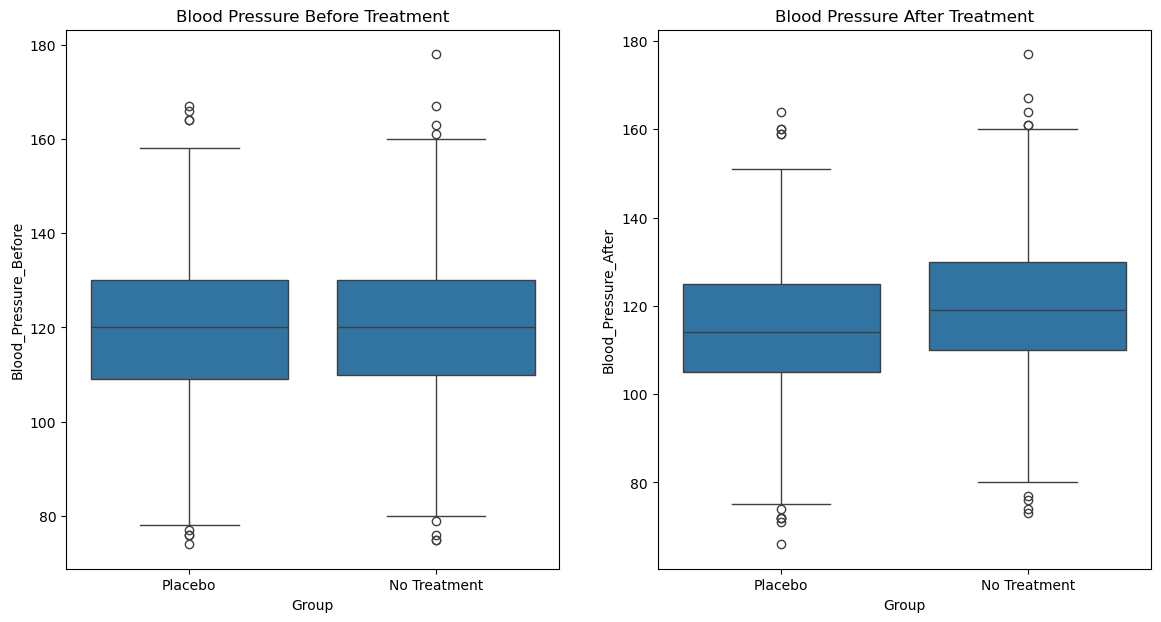

In [75]:
# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Blood_Pressure_Before', data=df)
plt.title('Blood Pressure Before Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Blood_Pressure_After', data=df)
plt.title('Blood Pressure After Treatment')

plt.show()


In [81]:
# Paired t-test
# For Placebo Group
t_stat_placebo, p_value_placebo = stats.ttest_rel(placebo_group['Blood_Pressure_Before'], placebo_group['Blood_Pressure_After'])

# For No Treatment Group
t_stat_no_treatment, p_value_no_treatment = stats.ttest_rel(no_treatment_group['Blood_Pressure_Before'], no_treatment_group['Blood_Pressure_After'])

print("\nPaired t-test results:")
print(f"Placebo Group: t-statistic = {t_stat_placebo:.3f}, p-value = {p_value_placebo:.3f}")
print(f"No Treatment Group: t-statistic = {t_stat_no_treatment:.3f}, p-value = {p_value_no_treatment:.3f}")



Paired t-test results:
Placebo Group: t-statistic = 51.105, p-value = 0.000
No Treatment Group: t-statistic = 0.401, p-value = 0.689


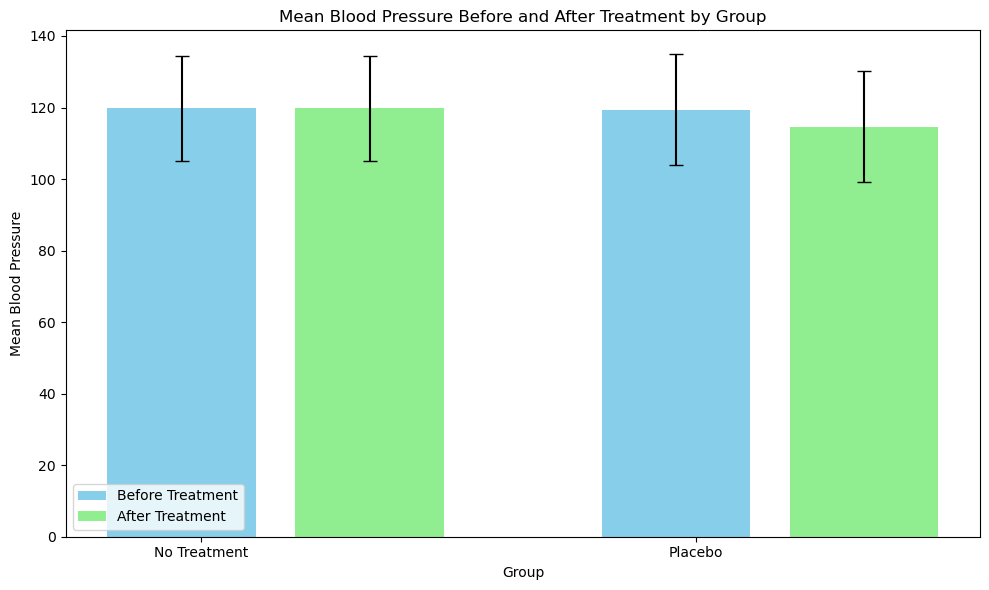

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fake_placebo_no_treatment_blood_pressure_data.csv')

# Calculate mean and standard deviation of blood pressure before and after treatment for each group
mean_before = df.groupby('Group')['Blood_Pressure_Before'].mean()
mean_after = df.groupby('Group')['Blood_Pressure_After'].mean()
std_before = df.groupby('Group')['Blood_Pressure_Before'].std()
std_after = df.groupby('Group')['Blood_Pressure_After'].std()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.3

# Positions of the bars on the x-axis
index = np.arange(len(mean_before.index))

# Plot bars with space between them
space = 0.2  # Space between bars within each group
bar1 = ax.bar(index - space/5, mean_before, bar_width, yerr=std_before, capsize=5, label='Before Treatment', color='skyblue')
bar2 = ax.bar(index + bar_width + space/5, mean_after, bar_width, yerr=std_after, capsize=5, label='After Treatment', color='lightgreen')

# Adding labels, title, and ticks
ax.set_xlabel('Group')
ax.set_ylabel('Mean Blood Pressure')
ax.set_title('Mean Blood Pressure Before and After Treatment by Group')
ax.set_xticks(index)
ax.set_xticklabels(mean_before.index)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
